# Zadanie 21

In [15]:
import random
import math

In [16]:
def poisson(lam, T, M):
    t = 0
    I = 0
    S = []
    while t <= T:
        U1 = random.random()
        t -= math.log(U1)/M
        U2 = random.random()
        if U2 <= lam(t)/M:
            I += 1
            S.append(t)
    return S

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plotProcesPoissona(S, color = 'k'):
    N = range(len(S))
    plt.scatter(S[1:-1], N[:-2], s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(S) - 1):
        x = [S[i], S[i+1]]
        y = [N[i], N[i]]
        plt.plot(x,y, color = color)
    plt.plot(S[-1], N[-1])

In [19]:
def plotExample(fun, T, M):
    S = poisson(fun, T, M)
    
    plt.figure(figsize = (12,10))
    plotProcesPoissona(S)
    plt.xlabel('t')
    plt.ylabel('N(t)')
    plt.show()

In [20]:
def lambda1(t):
    return (math.sin(t))**4

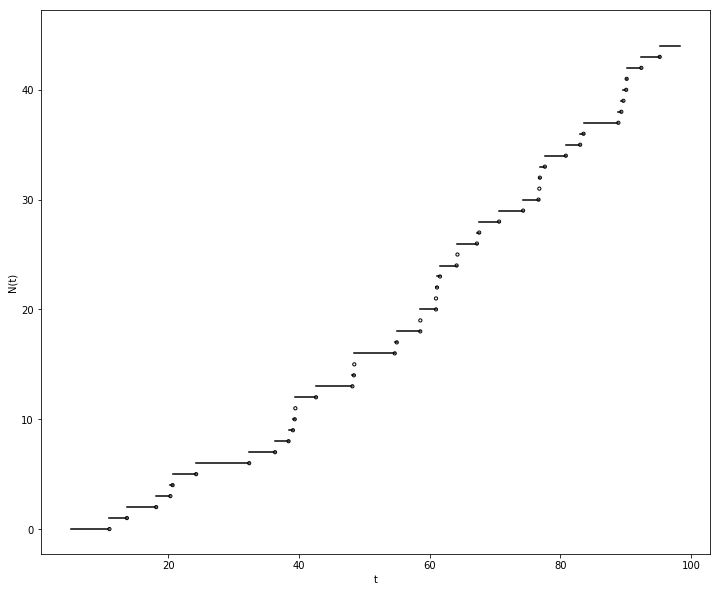

In [21]:
plotExample(lambda1, 100, 1)

In [22]:
def lambda2(t):
    return t**4

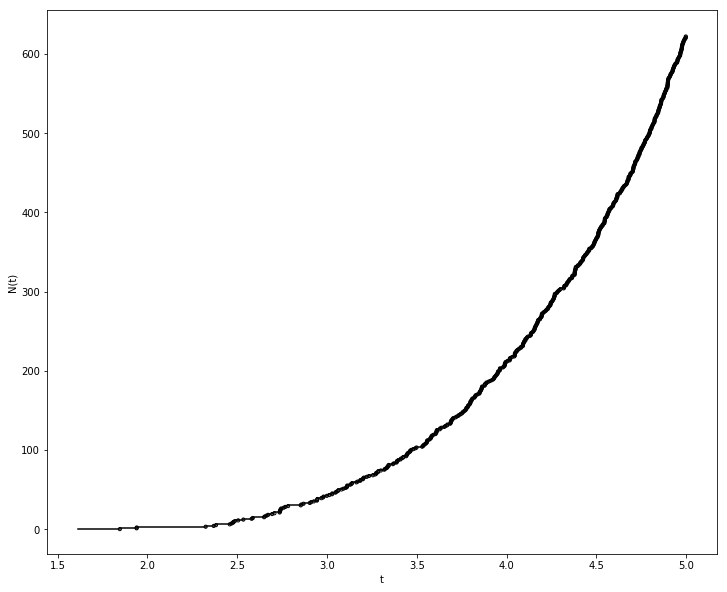

In [23]:
plotExample(lambda2, 5, 625)

In [24]:
def lambda3(t):
    return 100*math.exp(-t**2)

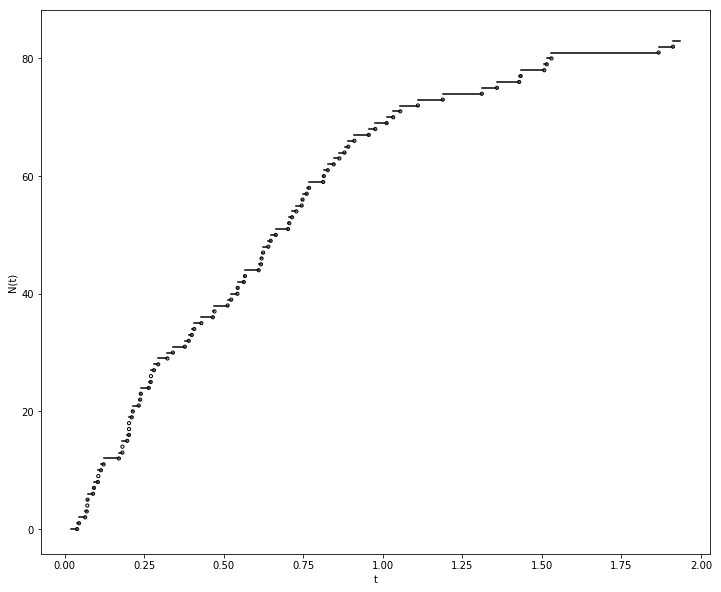

In [25]:
plotExample(lambda3, 10, 100)

In [26]:
def lambda4(t):
    return t

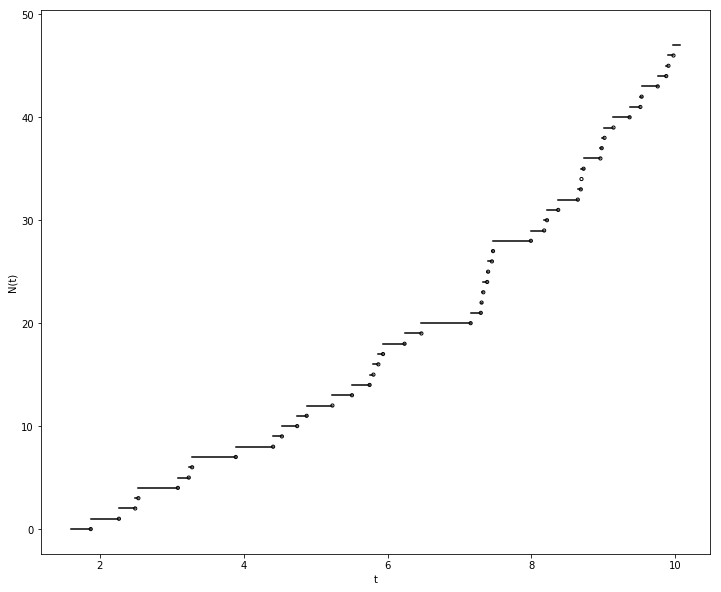

In [27]:
plotExample(lambda4, 10, 10)

In [28]:
def lambda5(t):
    return t**2

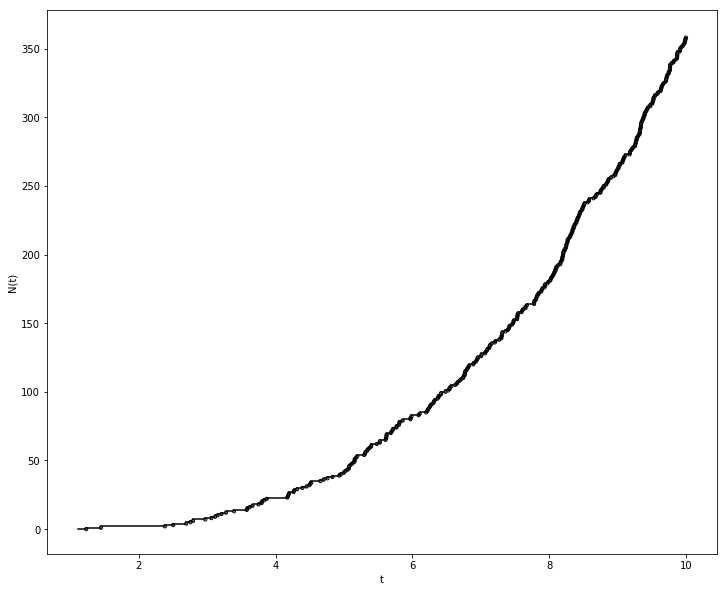

In [29]:
plotExample(lambda5, 10, 100)

In [30]:
def lambda6(t):
    return 1/(t+1)

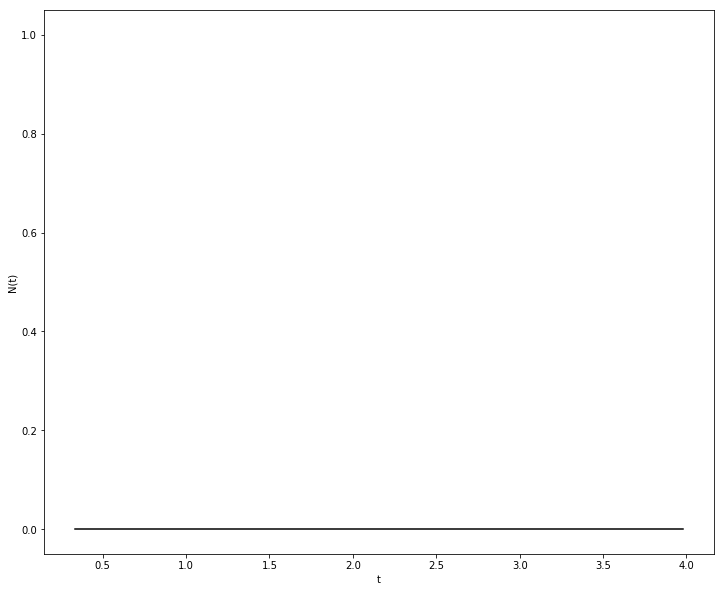

In [31]:
plotExample(lambda6, 10, 1)

# Zadanie 22

Niech $\lambda$(t) = $\frac{1}{t+1}$. Wtedy $F_s (x) = \ldots = \frac{x}{x+s+1}$ Natomiast $F_s^{-1}(y) = \frac{y(s+1)}{1-y}$. Można pokazać, że $S_1 = \frac{U_1}{1-U_1}, S_n = \frac{S_{n-1} + U_n}{1 - U_n}.$

In [32]:
def generujNPP(T):
    t = 0
    S = []
    while t <= T:
        u = random.random()    
        t += (t+u)/(1-u)
        S.append(t)
    return S

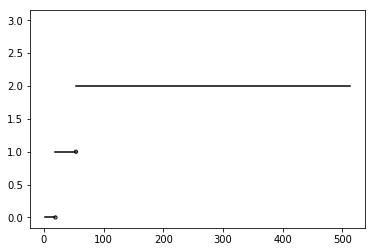

In [33]:
S = generujNPP(100)
plotProcesPoissona(S)
plt.show()

# Zadanie 23

In [34]:
from scipy.optimize import fmin, fminbound
import scipy.integrate as integrate
import numpy as np

In [35]:
def generujNPP2(lam, T):
    result = integrate.quad(lam, 0, T)[0]
    n = np.random.poisson(result)
    if n == 0:
        return None
    M = lam(fminbound(lambda x: -lam(x), 0, T))/result
    S = []
    for _ in range(n):
        u1 = random.uniform(0,T)
        u2 = random.uniform(0,M)
        if u2 <= lam(u1)/result:
            S.append(u1) 
    S.sort()
    return S

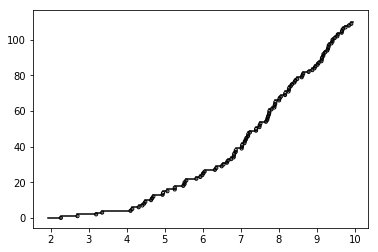

In [36]:
S = generujNPP2(lambda5, 10)
plotProcesPoissona(S)
plt.show()

# Zadanie 24

In [37]:
import time

In [38]:
zakres = np.arange(1, 4500, 150)

In [50]:
timePoisson = []
for i in zakres:
    start = time.time()
    time.sleep(0.01)
    S = poisson(lambda5, i, 1)
    end = time.time() - start - 0.01
    timePoisson.append(end)

In [47]:
timeNPP = []
for i in zakres:
    start = time.time()
    time.sleep(0.01)
    S = generujNPP(i)
    end = time.time() - start - 0.01
    timeNPP.append(end)

In [51]:
timeNPP2 = []
for i in zakres:
    start = time.time()
    time.sleep(0.01)
    S = generujNPP2(lambda5, i)
    end = time.time() - start - 0.01
    timeNPP2.append(end)

KeyboardInterrupt: 

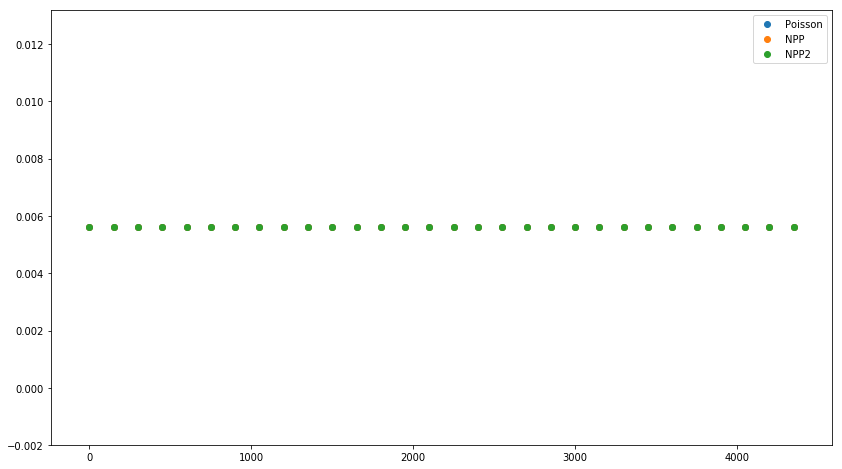

In [49]:
plt.figure(figsize = (14,8))

plt.scatter(zakres, timePoisson, label = 'Poisson')
#plt.scatter(zakres, timeNPP, label = 'NPP')
plt.scatter(zakres, timeNPP2, label = 'NPP2')
plt.legend()
plt.show()